## Henüz yetiştiremedim, hala çalışıyorum. 1 ve 2. sorular görece bitmiş olsa da 3. soruyu hala  çözebilmiş değilim.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### Burada hangi regresyon modelinin en yüksek skoru verdiğini kontrol edebilmek adına bir fonksiyon yazdım. Bu sayede verilen data için en uygun regresyon modelini belirleyebiliyorum.

In [56]:
def getregressions(X,y):
    modelfishLinear = LinearRegression()
    modelfishLinear.fit(X,y)
    LinearRsqr = modelfishLinear.score(X,y)
    
    modelfishRidge = Ridge()
    modelfishRidge.fit(X,y)
    RidgeRsqr = modelfishRidge.score(X,y)
    
    modelfishLasso = Lasso()
    modelfishLasso.fit(X,y)
    LassoRsqr = modelfishLasso.score(X,y)
    
    modelfishElastic = ElasticNet()
    modelfishElastic.fit(X,y)
    ElasticRsqr = modelfishElastic.score(X,y)
    return LinearRsqr, RidgeRsqr, LassoRsqr, ElasticRsqr

## Question 1

In [57]:
from statsmodels.datasets import copper
prices = copper.data.load_pandas()
copper = prices['data']
copper

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


#### burada heatmap yardımı ile hangi değerlerin korelasyonlu oldugu bulundu
#### burada 3 ve 4 numaralı değişkenler diğer bütün parametler ile oldukça düşük korelasyonlu iken, diğerleri arasında oldukça yüksek ilişki mevcut
#### bu yüzden ols tablosundaki sıralamayı bu katsayılara bakarak ele alacağım. 

<AxesSubplot:>

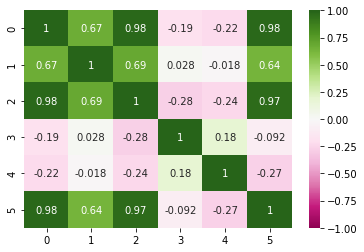

In [58]:
cor = np.corrcoef(copper.transpose())
sns.heatmap(cor,cmap='PiYG', annot=True, vmin=-1, vmax=1) 

#### en yüksek ilişkili olan zaman gibi gözüküyor.

In [59]:
X1 = copper.iloc[:,0:5]
y1 = copper.iloc[:,5:6]

modelcopper1 = ols("TIME ~  WORLDCONSUMPTION + INCOMEINDEX + COPPERPRICE + ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TIME   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     307.7
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.72e-17
Time:                        23:47:14   Log-Likelihood:                -29.785
No. Observations:                  25   AIC:                             71.57
Df Residuals:                      19   BIC:                             78.88
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.1656      7.443     -3.112      0.006     -38.744      -7.587
WORLDCONSUMPTION     0.0020      0.001      3.429      0.003       0.001       0.003
INCOMEINDEX         32.2185      7.488      4.303      0.000      16.547      47.890
COPPERPRICE         -0.1259      0.041     -3.080      0.006      -0.211      -0.040
ALUMPRICE            0.5748      0.097      5.950      0.000       0.373       0.777
INVENTORYINDEX     -12.0591      5.675     -2.125      0.047     -23.938      -0.181
==============================================================================
Omnibus:                        0.663   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.271
Skew:                           0.255   Prob(JB):                        0.873
Kurtosis:                       2.983   Cond. No.                     3.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ancak diğerlerine de bakmak gerekiyor. 

In [71]:
modelcopper2 = ols(" WORLDCONSUMPTION ~  TIME + INCOMEINDEX + COPPERPRICE + ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.11e-15
Time:                        23:59:23   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        283.9552   2768.572      0.103      0.919   -5510.733    6078.644
TIME             187.2307     54.595      3.429      0.003      72.961     301.500
INCOMEINDEX     1442.8858   3168.592      0.455      0.654   -5189.054    8074.826
COPPERPRICE       15.0432     14.761      1.019      0.321     -15.852      45.938
ALUMPRICE        -64.1230     47.258     -1.357      0.191    -163.035      34.789
INVENTORYINDEX  2450.3845   1827.270      1.341      0.196   -1374.136    6274.905
==============================================================================
Omnibus:                        8.395   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.465
Skew:                          -0.959   Prob(JB):                       0.0395
Kurtosis:                       4.589   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
modelcopper3 = ols(" COPPERPRICE ~  TIME + WORLDCONSUMPTION + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            COPPERPRICE   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     9.278
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           0.000133
Time:                        23:59:51   Log-Likelihood:                -67.842
No. Observations:                  25   AIC:                             147.7
Df Residuals:                      19   BIC:                             155.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -97.4355     35.453     -2.748      0.013    -171.639     -23.232
TIME                -2.6442      0.859     -3.080      0.006      -4.441      -0.847
WORLDCONSUMPTION     0.0034      0.003      1.019      0.321      -0.004       0.011
INCOMEINDEX        132.8351     37.362      3.555      0.002      54.635     211.036
ALUMPRICE            2.0732      0.579      3.583      0.002       0.862       3.284
INVENTORYINDEX     -15.1081     28.725     -0.526      0.605     -75.230      45.013
==============================================================================
Omnibus:                        2.887   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.376
Skew:                           0.736   Prob(JB):                        0.305
Kurtosis:                       2.662   Cond. No.                     3.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
modelcopper4 = ols("INCOMEINDEX ~  TIME + WORLDCONSUMPTION +  COPPERPRICE+ ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCOMEINDEX   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     248.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.28e-16
Time:                        00:00:08   Log-Likelihood:                 65.855
No. Observations:                  25   AIC:                            -119.7
Df Residuals:                      19   BIC:                            -112.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6635      0.129      5.150      0.000       0.394       0.933
TIME                 0.0153      0.004      4.303      0.000       0.008       0.023
WORLDCONSUMPTION  7.482e-06   1.64e-05      0.455      0.654   -2.69e-05    4.19e-05
COPPERPRICE          0.0030      0.001      3.555      0.002       0.001       0.005
ALUMPRICE           -0.0121      0.002     -5.456      0.000      -0.017      -0.007
INVENTORYINDEX       0.1453      0.134      1.088      0.290      -0.134       0.425
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.001
Skew:                           0.250   Prob(JB):                        0.606
Kurtosis:                       2.156   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS tablolarından da görüldüğü üzere R^2 değeri en yüksek ve p-değeri en düşük olan ilişki model1 olarak karşımıza çıkıyor.

In [60]:
anova_lm(modelcopper1)

,df,sum_sq,mean_sq,F,PR(>F)
WORLDCONSUMPTION,1.0,1248.060785,1248.060785,1495.125520,1.570191e-19
INCOMEINDEX,1.0,1.756353,1.756353,2.104038,1.632200e-01
COPPERPRICE,1.0,1.836383,1.836383,2.199912,1.544174e-01
ALUMPRICE,1.0,28.717286,28.717286,34.402128,1.196406e-05
INVENTORYINDEX,1.0,3.768882,3.768882,4.514965,4.694128e-02
Residual,19.0,15.860310,0.834753,NaN,NaN


#### Burada ise açık bir şekilde modelimiz açıklayan en iyi regresyon modelinin lineer regresyon olduğu gözükmekte. 

In [61]:
getregressions(X1,y1)

(0.9877997611854856,
 0.9722374878223046,
 0.9661498206080497,
 0.9697557535038337)

## Question 2

In [62]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';', header = None, names = ["CIC0", "SM1_Dz", "GATS1i", "NdsCH", "NdssC", "MLOGP", "LC50"])
fish

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [63]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CIC0    908 non-null    float64
 1   SM1_Dz  908 non-null    float64
 2   GATS1i  908 non-null    float64
 3   NdsCH   908 non-null    int64  
 4   NdssC   908 non-null    int64  
 5   MLOGP   908 non-null    float64
 6   LC50    908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


<AxesSubplot:>

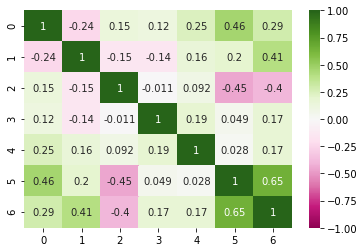

In [64]:
corfish = np.corrcoef(fish.transpose())
sns.heatmap(corfish,cmap='PiYG', annot=True, vmin=-1, vmax=1)

In [69]:
X2 = fish.iloc[:,0:6]
y2 = fish.iloc[:,6:7]
getregressions(X2, y2)

(0.5771635677620811, 0.577150787522513, 0.1944092781207699, 0.3218795769601678)

In [70]:
modelfish = ols("LC50 ~  CIC0 + SM1_Dz + GATS1i + NdsCH + NdssC + MLOGP", data=fish).fit()
modelfish.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          1.33e-164
Time:                        23:52:28   Log-Likelihood:                -1238.0
No. Observations:                 908   AIC:                             2490.
Df Residuals:                     901   BIC:                             2524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1746      0.181     12.000      0.000       1.819       2.530
CIC0           0.3856      0.061      6.333      0.000       0.266       0.505
SM1_Dz         1.2556      0.087     14.430      0.000       1.085       1.426
GATS1i        -0.7464      0.101     -7.365      0.000      -0.945      -0.548
NdsCH          0.4136      0.054      7.644      0.000       0.307       0.520
NdssC          0.0643      0.041      1.583      0.114      -0.015       0.144
MLOGP          0.3901      0.034     11.555      0.000       0.324       0.456
==============================================================================
Omnibus:                      100.278   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.239
Skew:                           0.468   Prob(JB):                     4.46e-83
Kurtosis:                       6.024   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question3

In [19]:
n = pd.read_excel("names.xlsx") #datanın alındığı siteyi inceleyerek ilgili sutünların isimlerinin açıklamalarını buldum
#ardından bunları kopyalayarak bir excel dosyası içerisine attım ve headerları bu şekilde yerleştirdim.
names = n["Headers"].to_numpy()
interconnections = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                               sep=',',
                               header=None, names = names)

In [44]:
for i in range(len(names)-1):
    interconnections.loc[:,names[i]] = interconnections.loc[:,names[i]].replace("?",0)

community = interconnections.drop(columns=["state:", "countyCode:", "communityCode:","fold:"])
communitydata = community.groupby("communityname:").mean()

state = interconnections.drop(columns=["communityname:", "countyCode:", "communityCode:","fold:"])
statedata = state.groupby("state:").mean()

In [65]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 143 entries, state: to nonViolPerPop:
dtypes: float64(75), int64(28), object(40)
memory usage: 2.4+ MB
